In [24]:
import numpy as np

class DecisionStump:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.alpha = None
        self.prediction = None

    def train(self, X, y, weights):
        num_samples, num_features = X.shape
        min_error = float('inf')

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                p = 1
                predictions = np.ones(num_samples)
                predictions[X[:, feature] < threshold] = -1
                error = np.sum(weights[y != predictions])

                if error > 0.5:
                    error = 1 - error
                    p = -1

                if error < min_error:
                    min_error = error
                    self.feature_index = feature
                    self.threshold = threshold
                    self.prediction = p

    def predict(self, X):
        num_samples = X.shape[0]
        predictions = np.ones(num_samples)
        predictions[X[:, self.feature_index] < self.threshold] = -1
        return predictions * self.prediction

class AdaBoost:
    def __init__(self, num_weak_learners):
        self.num_weak_learners = num_weak_learners
        self.weak_learners = []
        self.alphas = []

    def train(self, X, y):
        num_samples = X.shape[0]
        weights = np.full(num_samples, 1 / num_samples)

        for _ in range(self.num_weak_learners):
            weak_learner = DecisionStump()
            weak_learner.train(X, y, weights)
            predictions = weak_learner.predict(X)
            error = np.sum(weights[y != predictions])

            alpha = 0.5 * np.log((1 - error) / error)
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)

            self.weak_learners.append(weak_learner)
            self.alphas.append(alpha)

    def predict(self, X):
        num_samples = X.shape[0]
        predictions = np.zeros(num_samples)

        for weak_learner, alpha in zip(self.weak_learners, self.alphas):
            predictions += alpha * weak_learner.predict(X)

        return np.sign(predictions)

# Preprocessing the dataset
def preprocess_dataset(X, y, class1, class2):
    class1_indices = np.where((y == class1))[0]
    class2_indices = np.where((y == class2))[0]
    indices = np.concatenate((class1_indices, class2_indices))
    X_preprocessed = X[indices]
    y_preprocessed = y[indices]
    y_preprocessed[y_preprocessed == class1] = 1
    y_preprocessed[y_preprocessed == class2] = -1
    return X_preprocessed, y_preprocessed

# Load the training and test datasets
train_data = np.loadtxt('train.txt')
test_data = np.loadtxt('test.txt')

# Split the training dataset into features and labels
X_train = train_data[:, 1:]
y_train = train_data[:, 0]

# Split the test dataset into features and labels
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

# Preprocess the datasets for classifying "1" vs "3"
X_train_1_vs_3, y_train_1_vs_3 = preprocess_dataset(X_train, y_train, 1, 3)
X_test_1_vs_3, y_test_1_vs_3 = preprocess_dataset(X_test, y_test, 1, 3)

# Preprocess the datasets for classifying "3" vs "5"
X_train_3_vs_5, y_train_3_vs_5 = preprocess_dataset(X_train, y_train, 3, 5)
X_test_3_vs_5, y_test_3_vs_5 = preprocess_dataset(X_test, y_test, 3, 5)

# Train and evaluate the AdaBoost model for classifying "1" vs "3"
ada_boost_1_vs_3 = AdaBoost(num_weak_learners=10)
ada_boost_1_vs_3.train(X_train_1_vs_3, y_train_1_vs_3)
train_predictions_1_vs_3 = ada_boost_1_vs_3.predict(X_train_1_vs_3)
test_predictions_1_vs_3 = ada_boost_1_vs_3.predict(X_test_1_vs_3)
train_error_1_vs_3 = np.mean(train_predictions_1_vs_3 != y_train_1_vs_3)
test_error_1_vs_3 = np.mean(test_predictions_1_vs_3 != y_test_1_vs_3)
print("train_error_1_vs_3",train_error_1_vs_3)
print("test_error_1_vs_3",test_error_1_vs_3)

# Train and evaluate the AdaBoost model for classifying "3" vs "5"
ada_boost_3_vs_5 = AdaBoost(num_weak_learners=10)
ada_boost_3_vs_5.train(X_train_3_vs_5, y_train_3_vs_5)
train_predictions_3_vs_5 = ada_boost_3_vs_5.predict(X_train_3_vs_5)
test_predictions_3_vs_5 = ada_boost_3_vs_5.predict(X_test_3_vs_5)
train_error_3_vs_5 = np.mean(train_predictions_3_vs_5 != y_train_3_vs_5)
test_error_3_vs_5 = np.mean(test_predictions_3_vs_5 != y_test_3_vs_5)
print("train_error_3_vs_5",train_error_3_vs_5)
print("test_error_3_vs_5",test_error_3_vs_5)

train_error_1_vs_3 0.0
test_error_1_vs_3 0.01627906976744186
train_error_3_vs_5 0.05354200988467875
test_error_3_vs_5 0.11042944785276074


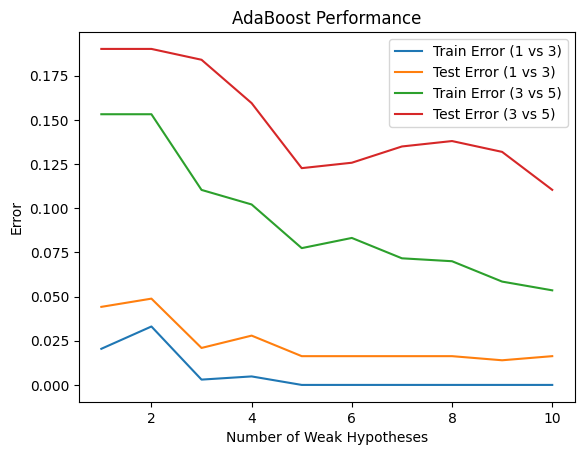

In [25]:
# Graphical reporting of errors
import matplotlib.pyplot as plt

num_weak_learners = range(1, 11)
train_errors_1_vs_3 = []
test_errors_1_vs_3 = []
train_errors_3_vs_5 = []
test_errors_3_vs_5 = []

for num_weak_learner in num_weak_learners:
    ada_boost_1_vs_3 = AdaBoost(num_weak_learners=num_weak_learner)
    ada_boost_1_vs_3.train(X_train_1_vs_3, y_train_1_vs_3)
    train_predictions_1_vs_3 = ada_boost_1_vs_3.predict(X_train_1_vs_3)
    test_predictions_1_vs_3 = ada_boost_1_vs_3.predict(X_test_1_vs_3)
    train_error_1_vs_3 = np.mean(train_predictions_1_vs_3 != y_train_1_vs_3)
    test_error_1_vs_3 = np.mean(test_predictions_1_vs_3 != y_test_1_vs_3)
    train_errors_1_vs_3.append(train_error_1_vs_3)
    test_errors_1_vs_3.append(test_error_1_vs_3)

    ada_boost_3_vs_5 = AdaBoost(num_weak_learners=num_weak_learner)
    ada_boost_3_vs_5.train(X_train_3_vs_5, y_train_3_vs_5)
    train_predictions_3_vs_5 = ada_boost_3_vs_5.predict(X_train_3_vs_5)
    test_predictions_3_vs_5 = ada_boost_3_vs_5.predict(X_test_3_vs_5)
    train_error_3_vs_5 = np.mean(train_predictions_3_vs_5 != y_train_3_vs_5)
    test_error_3_vs_5 = np.mean(test_predictions_3_vs_5 != y_test_3_vs_5)
    train_errors_3_vs_5.append(train_error_3_vs_5)
    test_errors_3_vs_5.append(test_error_3_vs_5)
    
plt.plot(num_weak_learners, train_errors_1_vs_3, label='Train Error (1 vs 3)')
plt.plot(num_weak_learners, test_errors_1_vs_3, label='Test Error (1 vs 3)')
plt.plot(num_weak_learners, train_errors_3_vs_5, label='Train Error (3 vs 5)')
plt.plot(num_weak_learners, test_errors_3_vs_5, label='Test Error (3 vs 5)')
plt.xlabel('Number of Weak Hypotheses')
plt.ylabel('Error')
plt.title('AdaBoost Performance')
plt.legend()
plt.show()